In [ ]:
import keras
from keras.datasets import fashion_mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
import numpy as np

train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 11s 3ms/step - loss: 0.4974 - accuracy: 0.8247
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3759 - accuracy: 0.8656
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3366 - accuracy: 0.8768
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3132 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2957 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2809 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2686 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2575 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2485 - accuracy: 0.9067
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.24

In [ ]:
loss, accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3304 - accuracy: 0.8882


In [ ]:
print("The loss is: ", loss)
print("The accuracy is: ", accuracy)

The loss is:  0.3304286301136017
The accuracy is:  0.8881999850273132


In [ ]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 2ms/step


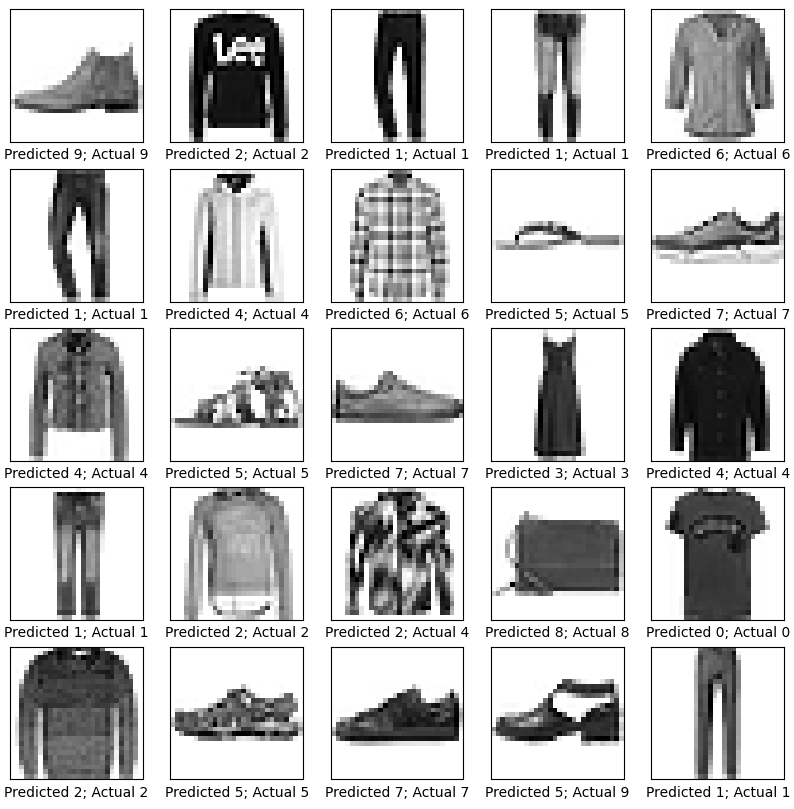

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  plt.xlabel(f"Predicted {predicted_labels[i]}; Actual {test_labels[i]}")

plt.show()
